## *Introduction*
#### *This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, we develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers*

## *Business Objectives*
#### *This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.*

#### *The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.*

## *Import libraries*

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## *Supress warnings*

In [18]:
# Filtering warnings for better readability
import warnings
warnings.filterwarnings("ignore")

## *Data Reading*

In [19]:
# Read csv file
app=pd.read_csv("C:/Users/Dipanwita Sikder/Documents/Python Project/Credit Risk Analysis/application_data.csv")

In [20]:
#To display all the columns & rows:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_column",200)

In [21]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [22]:
app.shape

(307511, 122)

In [23]:
#Confirming there are all unique entries in the data without any duplicates.
app.SK_ID_CURR.nunique()

307511

In [24]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [25]:
app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### *Checking the Null Count*

In [26]:
# Calculating NaNs percentage in columns
null_perc=100*(app.isnull().sum()/len(app))

In [27]:
# Displaying columns having null values > 40%

null_perc[null_perc > 40]

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

### *Dropping columns which are Greater than 40% of NaN*

In [28]:
#Dropping nulls have NaNs percentage more than 40
app.drop(null_perc[null_perc > 40].index,axis=1,inplace=True)

In [29]:
# Checking the shape of df to confirm drops of columns
app.shape

(307511, 73)

In [30]:
100*(app.isnull().sum()/len(app))
# by here we can conclude all the null values greater than 40 are removed

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

### *Checking & Imputing NaN values*

#### *OCCUPATION_TYPE*

In [31]:
# Checking value counts
app.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

##### As we can see most of the Loan Applicants are Laborers

In [32]:
# Imputing the occupation type with highest occurence "Laborers"
app.OCCUPATION_TYPE=app.OCCUPATION_TYPE.fillna(app.OCCUPATION_TYPE.mode()[0])

In [33]:
#confirming nulls in OCCUPATION_TYPE
app.OCCUPATION_TYPE.isna().sum()

0

##### AMT_ANNUITY

In [34]:
app.AMT_ANNUITY.mean()

27108.573909183444

In [35]:
app.AMT_ANNUITY.median()

24903.0

In [36]:
#Here we can impute the values of AMT_ANNUITY with the mean or median since the difference is not high.
app.AMT_ANNUITY=app.AMT_ANNUITY.fillna(app.AMT_ANNUITY.mean())

In [37]:
app.AMT_ANNUITY.isna().sum()

0

##### AMT_GOODS_PRICE

In [38]:
# imputing NaN for AMT_GOODS_PRICE
app.AMT_GOODS_PRICE.mean()

538396.2074288895

In [39]:
app.AMT_GOODS_PRICE.median()

450000.0

In [40]:
# Since the diff. between the median and mean is high this means there are outliers in the data
#So we can impute the NaN values with median

app.AMT_GOODS_PRICE=app.AMT_GOODS_PRICE.fillna(app.AMT_GOODS_PRICE.median())
app.AMT_GOODS_PRICE.isna().sum()

0

##### NAME_TYPE_SUITE

In [41]:
#Checking the value Counts

app.NAME_TYPE_SUITE.value_counts(dropna=False)

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [42]:
# we can impute the missing values as 'Unaccompanied'

app.NAME_TYPE_SUITE=app.NAME_TYPE_SUITE.fillna(app.NAME_TYPE_SUITE.mode()[0])

In [43]:
app.NAME_TYPE_SUITE.isna().sum()

0

##### EXT_SOURCE_2

In [44]:
# Check mean
app.EXT_SOURCE_2.mean()

0.5143926741308462

In [45]:
# Check Median
app.EXT_SOURCE_2.median()

0.5659614260608526

In [46]:
app.EXT_SOURCE_2=app.EXT_SOURCE_2.fillna(app.EXT_SOURCE_2.mode()[0])
app.EXT_SOURCE_2.isna().sum()

0

##### EXT_SOURCE_3

In [47]:
# check mean
app.EXT_SOURCE_3.mean()

0.5108529061799658

In [48]:
#check Median
app.EXT_SOURCE_3.median()

0.5352762504724826

In [49]:
#Since the mean and median are nearby values we can impute them with the either of them
app.EXT_SOURCE_3=app.EXT_SOURCE_3.fillna(app.EXT_SOURCE_3.median())
app.EXT_SOURCE_3.isna().sum()

0

In [50]:
app.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

##### AMT_REQ_CREDIT_BUREAU  & OBS_CNT_SOCIAL_CIRCLE

In [51]:
# Filling missing values of AMT_REQ_CREDIT_BUREAU
app.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(app.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace=True)
app.AMT_REQ_CREDIT_BUREAU_DAY.fillna(app.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace=True)
app.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(app.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace=True)
app.AMT_REQ_CREDIT_BUREAU_MON.fillna(app.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace=True)
app.AMT_REQ_CREDIT_BUREAU_QRT.fillna(app.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace=True)
app.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(app.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace=True)

#Filling Missing values of OBS_CNT_SOCIAL_CIRCLE
app.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)
app.OBS_60_CNT_SOCIAL_CIRCLE.fillna(app.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)
app.DEF_30_CNT_SOCIAL_CIRCLE.fillna(app.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)
app.DEF_60_CNT_SOCIAL_CIRCLE.fillna(app.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)

##### Checking  Organization Type & Income Type

In [52]:
app.ORGANIZATION_TYPE.value_counts().head()
#There are 55k organization type that are missing

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: ORGANIZATION_TYPE, dtype: int64

##### -There are 55k XNA values

In [53]:
app.NAME_INCOME_TYPE.value_counts()
# As we can see here almost all the 55k missing values of organization type are pensioners


Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

##### So in the income type we can see there are 55k values of pensioner same as in XNA values in Organization type

In [54]:
# So lets impute 55k organization types as Pensioners
app["ORGANIZATION_TYPE"]=app.ORGANIZATION_TYPE.replace("XNA","Pensioner")

##### Checking Data Types

In [55]:
#Checking data types of all columns
app.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [56]:
#checking gender value counts
app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [57]:
#Replacing XNA with Female
app.loc[app["CODE_GENDER"]=="XNA","CODE_GENDER"]='F'

In [58]:
# Checking value counts for columns in objects variables by using for loop
objects=["NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE","OCCUPATION_TYPE","WEEKDAY_APPR_PROCESS_START","ORGANIZATION_TYPE"]
for i in objects:
    print(app[i].value_counts())
    print('-------------------------------------------')

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
-------------------------------------------
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
-------------------------------------------
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64
-------------------------------------------
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         488

In [59]:
#changing DAYS_BIRTH to Age
app["Age"]=round(abs(app.DAYS_BIRTH/365)).astype(int)

In [60]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55


In [61]:
#Lets drop DAYS_BIRTH column

app.drop("DAYS_BIRTH",inplace=True,axis=1)

In [62]:
#Changing negative columns to positive

app.DAYS_EMPLOYED=abs(app.DAYS_EMPLOYED)
app.DAYS_REGISTRATION=abs(app.DAYS_REGISTRATION)
app.DAYS_ID_PUBLISH=abs(app.DAYS_ID_PUBLISH)
app.DAYS_LAST_PHONE_CHANGE=abs(app.DAYS_LAST_PHONE_CHANGE)

In [63]:
# Dropping unnecessary Columns

drop_columns=["DAYS_LAST_PHONE_CHANGE","REGION_POPULATION_RELATIVE","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_EMAIL",
              "REGION_RATING_CLIENT_W_CITY","HOUR_APPR_PROCESS_START","REG_REGION_NOT_WORK_REGION",
              "LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","FLAG_DOCUMENT_2",
              "FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8",
             "FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14",
             "FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20",
             "FLAG_DOCUMENT_21","CNT_CHILDREN","FLAG_CONT_MOBILE","FLAG_PHONE","CNT_FAM_MEMBERS","REG_REGION_NOT_LIVE_REGION",
              "REG_REGION_NOT_LIVE_REGION"]
app.drop(labels=drop_columns,axis=1,inplace=True)

### *Checking Outliers*

In [64]:
#Checking how many unique values are there in each column.
app.nunique().sort_values()

FLAG_MOBIL                         2
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        2
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
REG_CITY_NOT_LIVE_CITY             2
REGION_RATING_CLIENT               3
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
NAME_TYPE_SUITE                    7
WEEKDAY_APPR_PROCESS_START         7
NAME_INCOME_TYPE                   8
AMT_REQ_CREDIT_BUREAU_WEEK         9
DEF_60_CNT_SOCIAL_CIRCLE           9
AMT_REQ_CREDIT_BUREAU_DAY          9
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_QRT         11
OCCUPATION_TYPE                   18
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_YEAR        25
OBS_60_CNT_SOCIAL_CIRCLE          33
OBS_30_CNT_SOCIAL_CIRCLE          33
Age                               49
ORGANIZATION_TYPE                 58
E

##### As we can see less unique values are distinguished as categorical and high income values are recognized as continuous values

##### AMT_INCOME_TOTAL

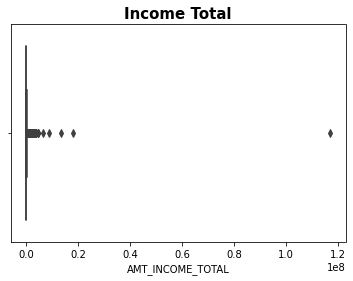

In [65]:
# Plotting a box plot for checking outliers
sns.boxplot(app.AMT_INCOME_TOTAL)
plt.title("Income Total",fontdict={"fontsize":15,"fontweight":"bold"})
plt.show()

##### we can confirm that there are few outliers with high income in Income Total

In [66]:
#checking outliers by quantiles
app.AMT_INCOME_TOTAL.quantile([0,0.5,0.9,0.95,0.999,1])

0.000        25650.0
0.500       147150.0
0.900       270000.0
0.950       337500.0
0.999       900000.0
1.000    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

###### As we can see only top 100 percentile has very high income value which is an outlier but we do not drop as it might be possible a loan applicant is having high income

In [67]:
app.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

##### AMT_CREDIT

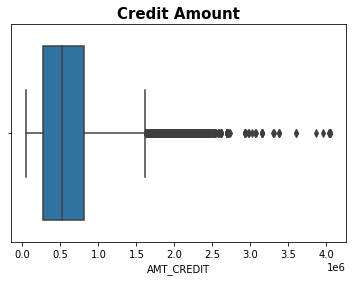

In [68]:
# Plotting a box plot for checking outliers

sns.boxplot(app.AMT_CREDIT)
plt.title("Credit Amount",fontdict={"fontsize":15,"fontweight":"bold"})
plt.show()

In [69]:
app.AMT_CREDIT.quantile([0.5,0.75,0.9,0.95,0.99,1])

0.50     513531.0
0.75     808650.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

In [70]:
app[app.AMT_CREDIT>2000000].shape

(2029, 37)

###### As we can see there are about 2000 outliers whose credit amount is higher and being regarded as outliers
###### we do not remove this data points as this may hamper the analysis

##### AMT_ANNUITY

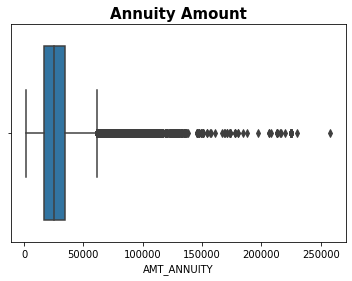

In [71]:
# Plotting a box plot for checking outliers

sns.boxplot(app.AMT_ANNUITY)
plt.title("Annuity Amount",fontdict={"fontsize":15,"fontweight":"bold"})
plt.show()

In [72]:
app.AMT_ANNUITY.quantile([0.5,0.75,0.9,0.99,1])

0.50     24903.0
0.75     34596.0
0.90     45954.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

In [73]:
app[app.AMT_ANNUITY>80000].shape

(1523, 37)

##### As we can see there are around 1500 outliers in annuity amount column.

#### *AMT_GOODS_PRICE*

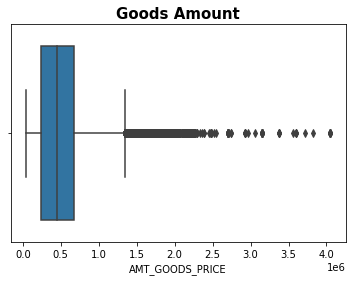

In [74]:
# Plotting a box plot for checking outliers

sns.boxplot(app.AMT_GOODS_PRICE)
plt.title("Goods Amount",fontdict={"fontsize":15,"fontweight":"bold"})
plt.show()

In [75]:
app.AMT_GOODS_PRICE.quantile([0.5,0.75,0.99,1])

0.50     450000.0
0.75     679500.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

###### we can see there are few outliers in Goods Price Amount

##### DAYS_EMPLOYED

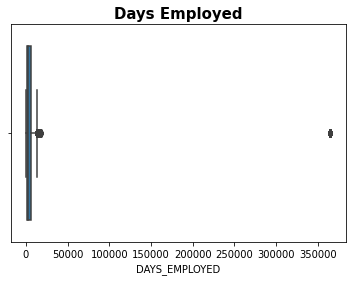

In [76]:
sns.boxplot(app.DAYS_EMPLOYED)
plt.title("Days Employed",fontdict={"fontsize":15,"fontweight":"bold"})
plt.show()

In [77]:
app.DAYS_EMPLOYED.quantile([0.5,0.75,0.8,0.9,0.99,1])
#Date Employed varies with each employee

0.50      2219.0
0.75      5707.0
0.80      9188.0
0.90    365243.0
0.99    365243.0
1.00    365243.0
Name: DAYS_EMPLOYED, dtype: float64

###### As we can see above 80% quantile all are having same days employed as outliers


### *Checking Imbalance in TARGET variable*

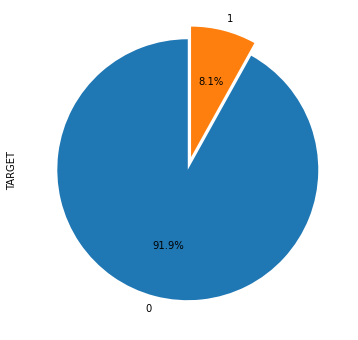

In [78]:
# Converting Target column into Object datatype:
app.TARGET.astype(str)

#Plotting a piechart to check the count value of On-time Repayers and defaulters
plt.figure(figsize=[6,6])
app.TARGET.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',startangle=90)
plt.show()

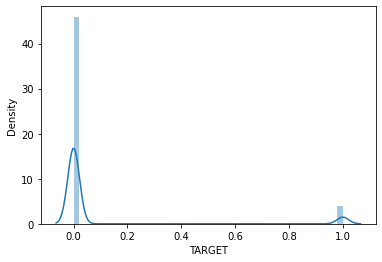

In [79]:
# Plotting for showing Imbalance in data
sns.distplot(app.TARGET)
plt.show()

In [80]:
app.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [81]:
# Finding ratio of imbalance
len(app[app["TARGET"]==1])/len(app[app["TARGET"]==0])

0.08781828601345662

### *-- Hence the imbalance ratio is 0.08 or 8 % of people only have payment difficulties--*

### -----------------------------------------------------------------------------------------------------------------------------------------------

### *Binning the Continuous variables*

In [82]:
# Creates Bins for AMT_INCOME_TOTAL
bins=[0,100000,200000,300000,500000,1000000000]
# Creating labels
bin_names=["Very Low(<1L)","Low(1L-2L)","Medium(2L-3L)","High(3L-5L)","Very High(5L+ )"]
app["INCOME_RANGE"]=pd.cut(app.AMT_INCOME_TOTAL,bins,labels=bin_names)

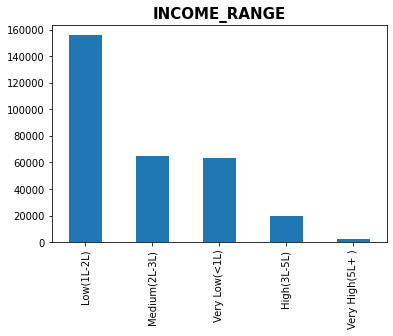

In [83]:
app.INCOME_RANGE.value_counts().plot.bar()
plt.title("INCOME_RANGE",fontdict={"fontsize":15,"fontweight":"bold"})
plt.show()

##### we can see most people have their income in the range of Low(1L-2L)

In [84]:
# Binning for AMT_CREDIT
app.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [85]:
bins=[0,100000,200000,400000,600000,1000000,2500000,5000000]
# Creating Labels
AMT_CREDIT_labels=["<1L","1L-2L","2L-4L","4L-6L","6L-10L","10L-25L","25L +",]
app["AMT_CREDIT_BINS"]=pd.cut(app.AMT_CREDIT,bins,labels=AMT_CREDIT_labels)

In [86]:
100*app.AMT_CREDIT_BINS.value_counts(normalize=True)

2L-4L      26.389625
6L-10L     24.051497
4L-6L      21.550449
10L-25L    16.137309
1L-2L       9.801275
<1L         1.952450
25L +       0.117394
Name: AMT_CREDIT_BINS, dtype: float64

##### we can observe that 26% of the people have taken loan for 2lakhs to 4 lakhs and nearly 24% people have applied for loan of 6 lakhs to 10 lakhs

##### Binning the age group

In [87]:
#Creatng Bins
bins=[20,30,40,50,60,70]
labels=["Below 30's","In 30's","In 40's","In 50's","In 60's"]
app["Age_Bins"]=pd.cut(app.Age,bins,labels=labels)

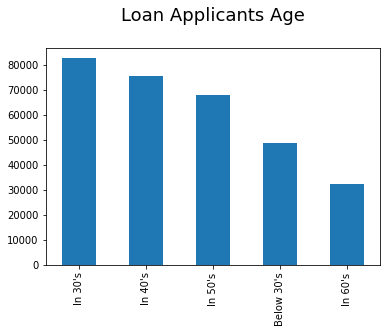

In [88]:
app.Age_Bins.value_counts().plot.bar()
plt.title("Loan Applicants Age\n",fontdict={'fontsize':18,'color':'black'})
plt.show()

#### *Most loan applicants are in the age of thier 30's*

### *Univariate Analysis of categorical Columns:*


###### Age Distribution

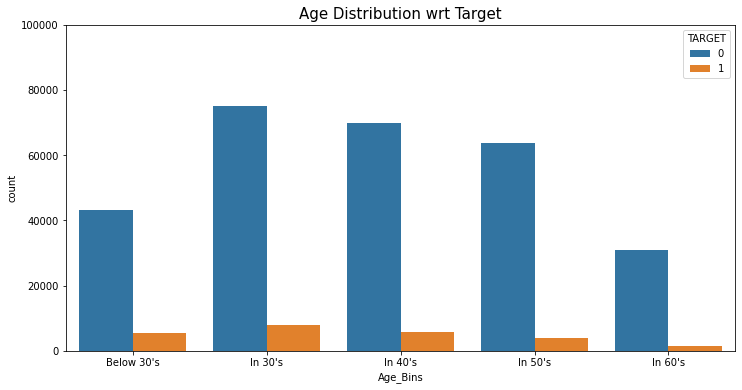

In [89]:
# Plotting a countplot for age bins
plt.figure(figsize=[12,6])
sns.countplot(app['Age_Bins'],hue=app["TARGET"])

#Limiting the y scale for better aesthetics
plt.ylim(0,100000)

plt.title("Age Distribution wrt Target",fontdict={'fontsize':15,'color':'black'})
plt.show()

#####                       *Observation: Loan applicants of age in 30's are able to make their payments on time* 

###### Income Distribution

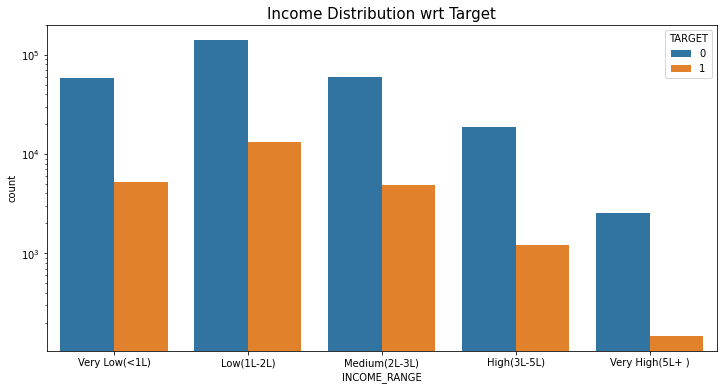

In [90]:
#Plotting Income Distribution
plt.figure(figsize=[12,6])
sns.countplot(app['INCOME_RANGE'],hue=app["TARGET"])
plt.title("Income Distribution wrt Target",fontdict={'fontsize':15,'color':'black'})
plt.yscale("log")
plt.show()

##### *Observation:Applicants with their income in range (5L+) have less difficulties in repayment on time and able to repay on time*

###### Credit Amount

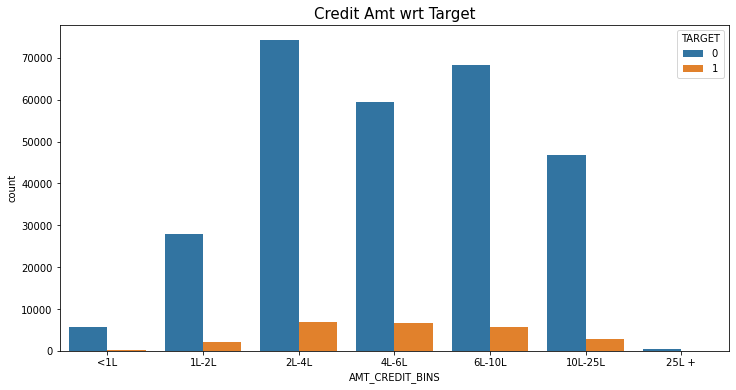

In [91]:
# Plotting countplot for Credit Amount
plt.figure(figsize=[12,6])
sns.countplot(app['AMT_CREDIT_BINS'],hue=app.TARGET)
plt.title("Credit Amt wrt Target",fontdict={'fontsize':15,'color':'black'})
plt.show()

##### *Here applicants with very high and low credit amount have very less defaulters*
##### *2L-4L credit amount is the highest credit range pickup with more defaulters*

###### Plotting for gender

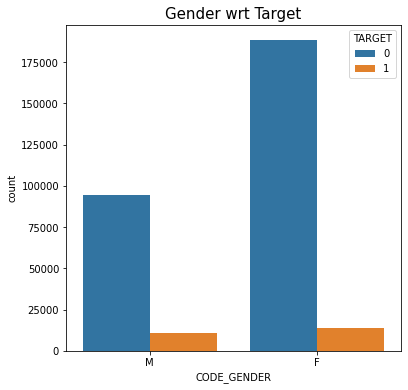

In [92]:
plt.figure(figsize=[6,6])
sns.countplot(app['CODE_GENDER'],hue=app.TARGET)
plt.title("Gender wrt Target",fontdict={'fontsize':15,'color':'black'})
plt.show()

##### *Observation: We can confirm that more loan applicants are females and most of them tend to repay. So banks should consider giving loans for women*

###### Income Type

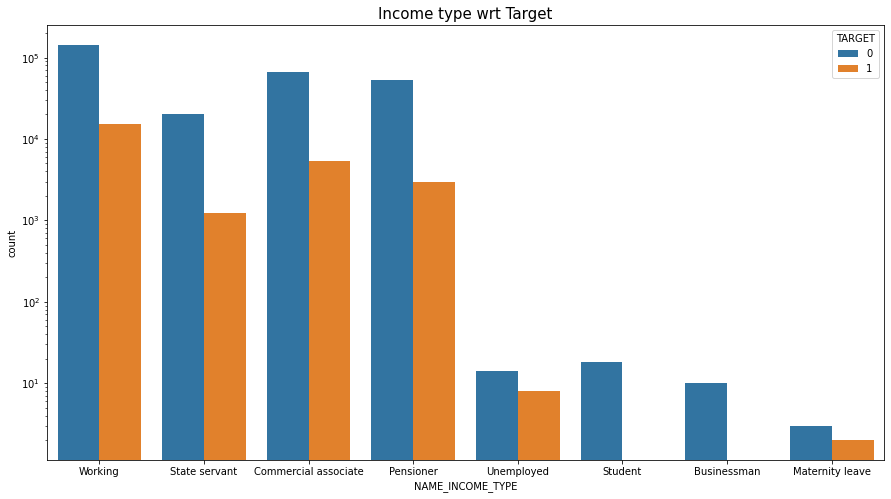

In [93]:
#Plotting countplot for income type
plt.figure(figsize=[15,8])
sns.countplot(app['NAME_INCOME_TYPE'],hue=app.TARGET)
plt.title("Income type wrt Target",fontdict={'fontsize':15,'color':'black'})
plt.yscale("log")
plt.show()

### *Observations*
#### *-Unemployed & Maternity Income type applicants have more defaulters and should be thouroughly rechecked before confirming loan*
#### *-Though Student and Business man are less in number they have nill default record. So can be considered for loan*
#### *-Most of the Loan applicants are Working professionals*

###### Contract Type


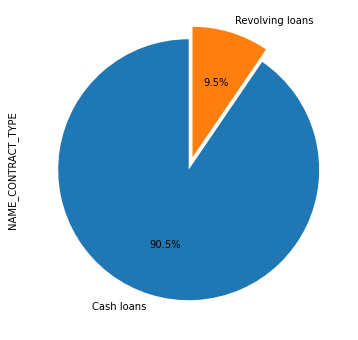

In [94]:
# Plotting a piechart for Contract Type
plt.figure(figsize=[6,6])
app.NAME_CONTRACT_TYPE.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',startangle=90)
plt.show()

###### As we can see around 90% of the loans are Cash Loans

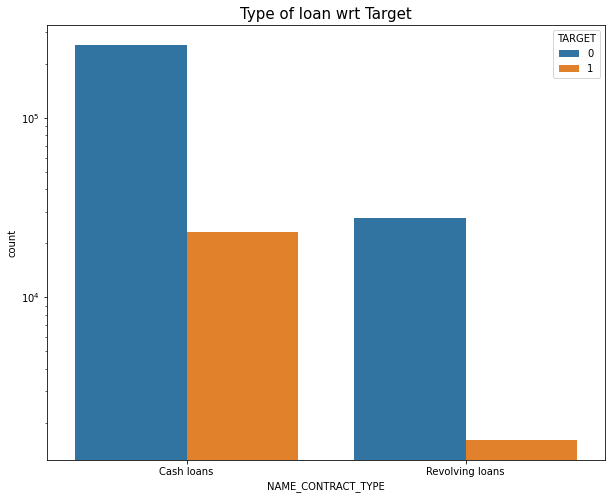

In [95]:
# Plotting countplot for Type of loan wrt Target
plt.figure(figsize=[10,8])
sns.countplot(app['NAME_CONTRACT_TYPE'],hue=app.TARGET)
plt.title("Type of loan wrt Target",fontdict={'fontsize':15,'color':'black'})
plt.yscale("log")
plt.show()

##### As we can see Revolving Loans have very less number of Defaulters.So consider giving loans of revolving type

##### Owning a Car

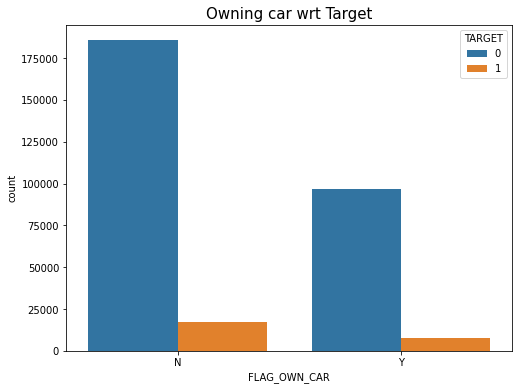

In [96]:
#Plotting a countplot for owning a car or not

plt.figure(figsize=[8,6])
sns.countplot(app['FLAG_OWN_CAR'],hue=app.TARGET)
plt.title("Owning car wrt Target",fontdict={'fontsize':15,'color':'black'})
plt.show()

##### *Obs:In general owning a car doesnt really affect the repayment of loans as in both the cases the defaulters are less*

##### Occupation Type

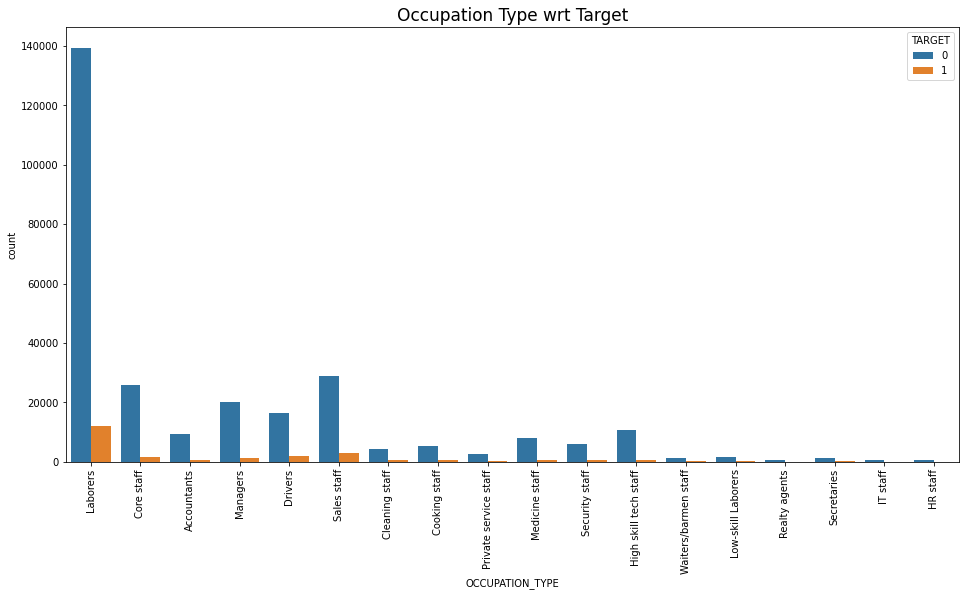

In [97]:
#Plotting a count plot for occupation type

plt.figure(figsize=[16,8])
sns.countplot(app['OCCUPATION_TYPE'],hue=app.TARGET)
plt.title("Occupation Type wrt Target",fontdict={'fontsize':17,'color':'black'})
plt.xticks(rotation=90)
plt.show()

##### *We can clearly understand that laborers are highest in repaying the loan in-time with very less difficulties*


##### Housing Type

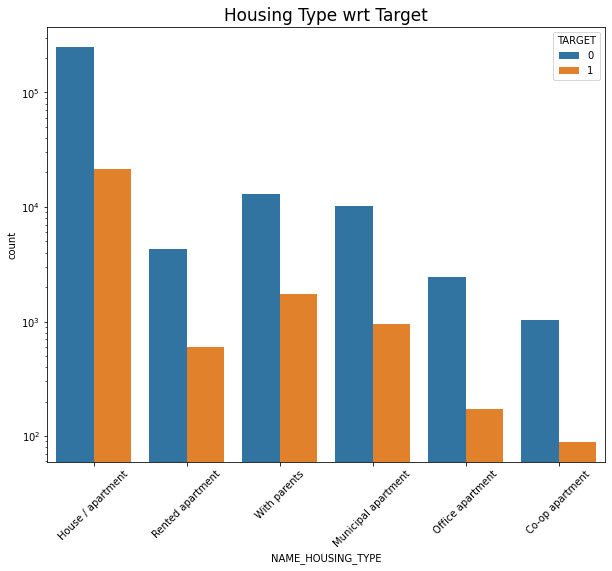

In [98]:
# Plotting a count plot for Housing type
plt.figure(figsize=[10,8])
sns.countplot(app['NAME_HOUSING_TYPE'],hue=app.TARGET)
plt.title("Housing Type wrt Target",fontdict={'fontsize':17,'color':'black'})
plt.xticks(rotation=45)
plt.yscale("log")
plt.show()

##### *As we can see co-op apartment have very less defaulters and should be preferred while giving loan & at the same time House/apartment  have more defaulters*

##### Region Rating

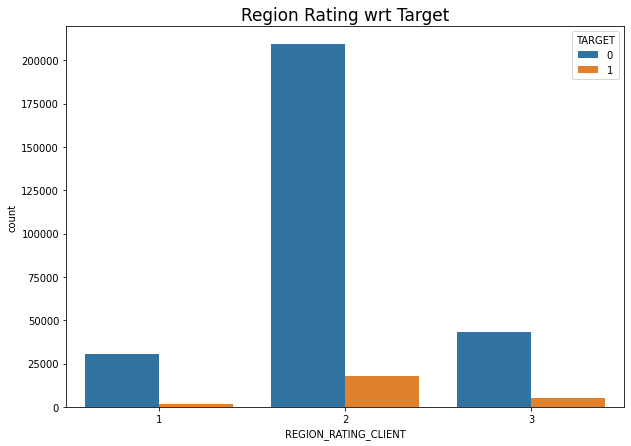

In [99]:
#Plotting a count plot for Region Rating
plt.figure(figsize=[10,7])
sns.countplot(app["REGION_RATING_CLIENT"],hue=app.TARGET)
plt.title("Region Rating wrt Target",fontdict={'fontsize':17,'color':'black'})
plt.show()

##### *-Region rating 1 has the lowest default rate so should be considered for loan application*
##### *-Whereas type 3 region has highest defaulter so should be reconsidered while giving loan*

##### Organization Type

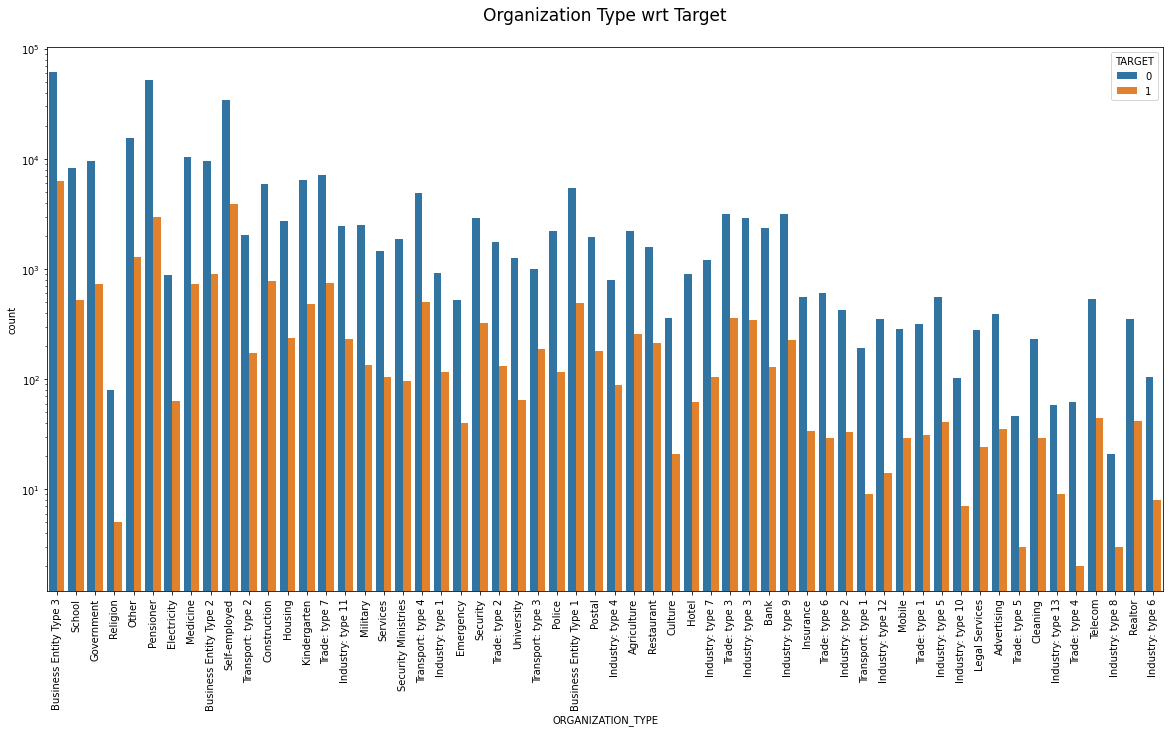

In [100]:
# Plotting a countplot for Organization Type wrt Target
plt.figure(figsize=[20,10])
sns.countplot(app["ORGANIZATION_TYPE"],hue=app.TARGET,orient='h')
plt.title("Organization Type wrt Target\n",fontdict={'fontsize':17,'color':'black'})
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

##### *Obs: We can observe that  most of the loan applicants are business entity type 3 followed by Pensioners and self employed*


### *Splitting the data into two df wrt Target=0 & 1*

In [101]:
# We are splitting the data into two for Target=0 & Target=1
app_t1=app[app["TARGET"]==1]
app_t0=app[app["TARGET"]==0]

In [102]:
# Here we are using Organization Type and Target for further analysis
m=app_t0.groupby(by="ORGANIZATION_TYPE",as_index=False)["TARGET"].count()
n=app_t1.groupby(by="ORGANIZATION_TYPE",as_index=False)["TARGET"].count()
n.columns=["ORGANIZATION_TYPE","TARGET_1"]
m=m.merge(n,on="ORGANIZATION_TYPE")
m.columns=["ORGANIZATION_TYPE","TARGET_0","TARGET_1"]

# Adding a new column -- percentage of defaulters
m["Perc_of_def"]=100*(m["TARGET_1"]/(m["TARGET_0"] + m["TARGET_1"]))

#### *Plotting Default Percentage for Organization Type*

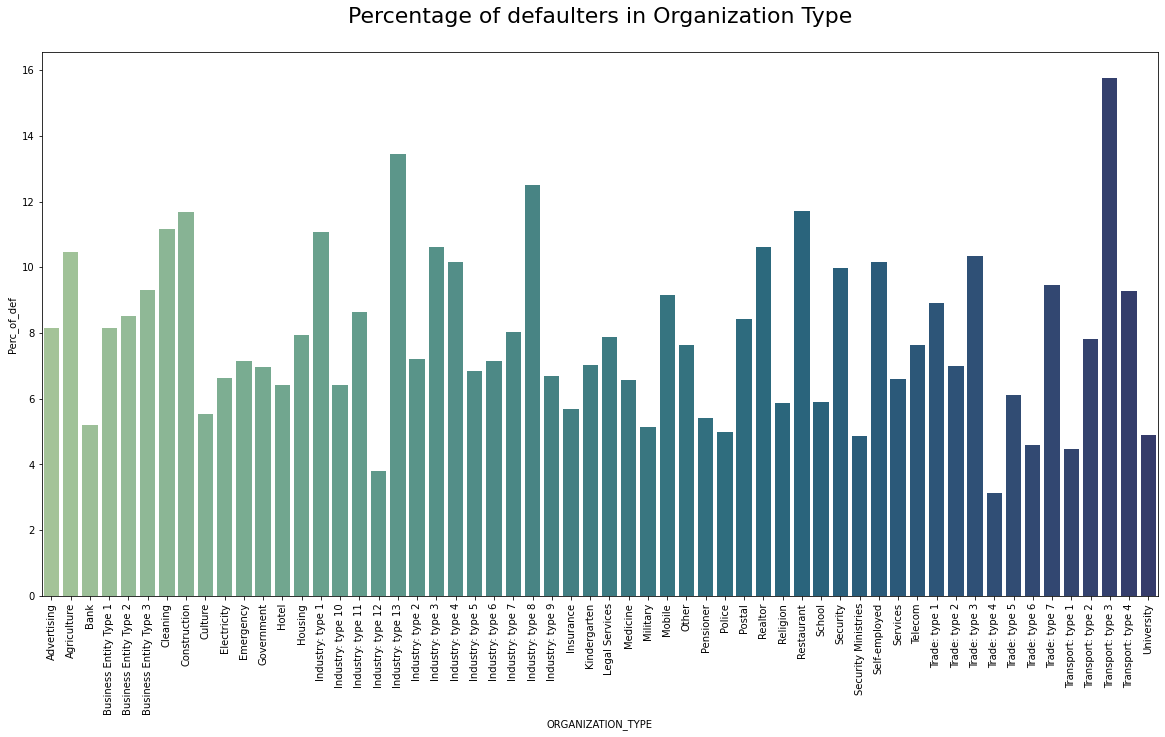

In [103]:
#Plotting barplot for defaulters percentage in Organization type 
plt.figure(figsize=[20,10])
sns.barplot(data=m,x="ORGANIZATION_TYPE",y="Perc_of_def",palette="crest")
plt.title("Percentage of defaulters in Organization Type\n",fontdict={'fontsize':22,'color':'black'})
plt.xticks(rotation=90)
plt.show()

##### *Obs: We can clearly say from here that Transport Type 3 are higher in default percentage followed by Industry Type 13 and Industry Type 8* 

## *Bivariate Analysis*
###  *-Numeric to Numeric*

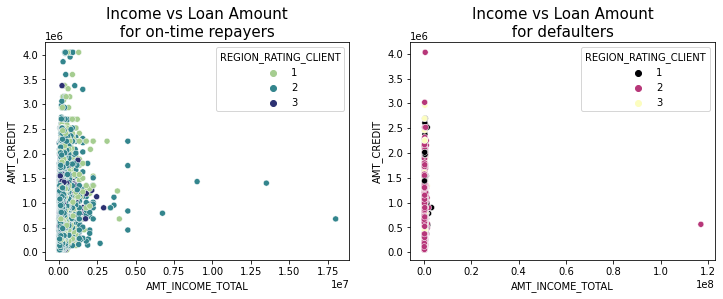

In [104]:
# Plotting Scatter plots for Numeric to Numeric columns:
plt.figure(figsize = [12,4])

#Plotting scatter plot for Income vs Loan Amount for on time Repayers
plt.subplot(1,2,1)
sns.scatterplot(data=app_t0,x="AMT_INCOME_TOTAL",y="AMT_CREDIT",hue='REGION_RATING_CLIENT',palette="crest")
plt.title("Income vs Loan Amount\n for on-time repayers ",fontdict={"fontsize":15,"color":'black'})

#Plotting scatter plot for Income vs Loan Amount for defaulters
plt.subplot(1,2,2)
sns.scatterplot(data=app_t1,x="AMT_INCOME_TOTAL",y="AMT_CREDIT",hue='REGION_RATING_CLIENT',palette="magma")
plt.title("Income vs Loan Amount\n for defaulters ",fontdict={"fontsize":15,"color":'black'})
plt.show()

###  *Observation:*
#####   *1- From here we can observe that on time repayers have more income as well as more likely to get more amount of loan where as compared to less income and less credit of defaulters*
 ##### *2- There is no Linear correlation between both*
 ##### *3- Most of the high income for on-time repayers are from Region Rating 2*

####   *AMT_CREDIT  vs  AMT_GOODS_PRICE*

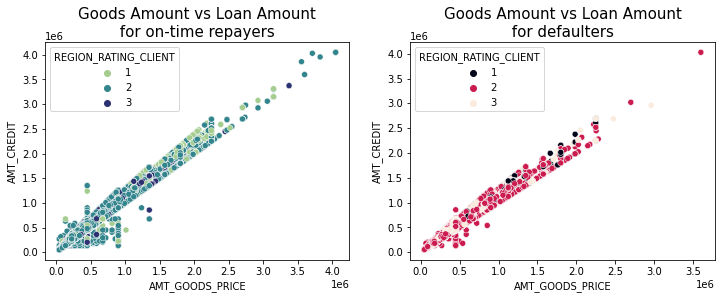

In [105]:
plt.figure(figsize = [12,4])
#Plotting scatter plot for Goods Amount vs Loan Amount for on time Repayers
plt.subplot(1,2,1)
sns.scatterplot(data=app_t0,x="AMT_GOODS_PRICE",y="AMT_CREDIT",hue='REGION_RATING_CLIENT',palette="crest")
plt.title("Goods Amount vs Loan Amount\n for on-time repayers ",fontdict={"fontsize":15,"color":'black'})

#Plotting scatter plot for Goods Amount vs Loan Amount for defaulters
plt.subplot(1,2,2)
sns.scatterplot(data=app_t1,x="AMT_GOODS_PRICE",y="AMT_CREDIT",hue='REGION_RATING_CLIENT',palette='rocket')
plt.title("Goods Amount vs Loan Amount\n for defaulters ",fontdict={"fontsize":15,"color":'black'})
plt.show()

### *Observation:*
#### *1- It clearly shows that both Loan amount and Goods Price are in Linear corelation between them*
#### *2- We can also see on-time repayers tend to get higher credit corresponding to higher goods price*
#### *3- Region rating 2 have acquired the highest amount of credit and most of them repay on time*

##### Using pairplot for analysing Numerical Columns

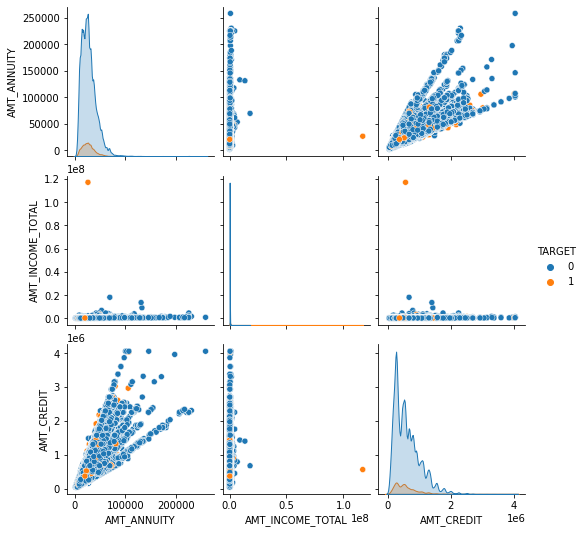

In [106]:
# Plotting a pair plot to understand about diff.variables at a time
numericals=app[["AMT_ANNUITY","AMT_INCOME_TOTAL","AMT_CREDIT","TARGET"]]
sns.pairplot(numericals,hue='TARGET')
plt.show()

### *Observation:*
#### *1- When Credit amount is greater than 30L and Annuity greater than 1L all of them repay on-time*

## *Bivariate -Categorical vs Numerical*


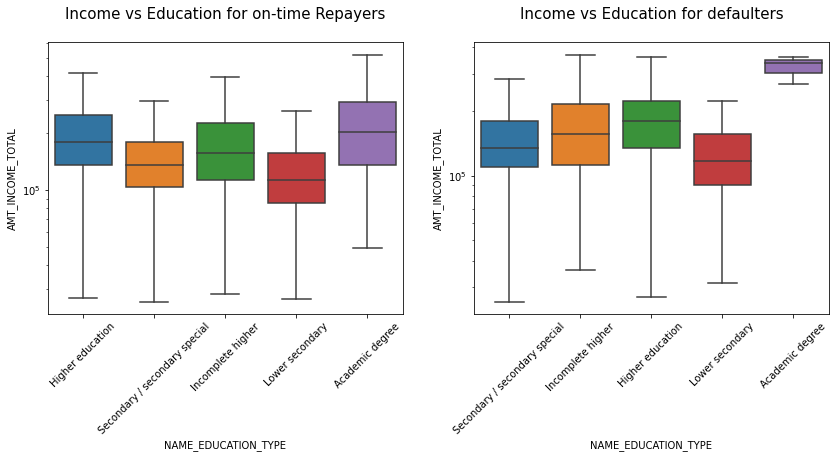

In [107]:
plt.figure(figsize=[14,5])

# Bivariate Analysis for Income Amount vs Education Type wrt on time repayers
plt.subplot(1,2,1)   # creating subplot
sns.boxplot(data=app_t0,x="NAME_EDUCATION_TYPE",y="AMT_INCOME_TOTAL",showfliers=False)
plt.title("Income vs Education for on-time Repayers\n",fontdict={"fontsize":15,'color':"black"})
plt.yscale("log")
plt.xticks(rotation=45)

# Bivariate Analysis for Income Amount vs Education Type wrt on Defaulters
plt.subplot(1,2,2)
sns.boxplot(data=app_t1,x="NAME_EDUCATION_TYPE",y="AMT_INCOME_TOTAL",showfliers=False)
plt.title("Income vs Education for defaulters\n",fontdict={"fontsize":15,'color':"black"})
plt.yscale("log")
plt.xticks(rotation=45)
plt.show()

### *Observations-*
#### *1- As we can see the median income of Academic category aims to be the highest for on-time repayers*
#### *2-There are also on-time repyers from higher education with more income compared to others*
#### *3- For Defaulters though the median salary of academic degree is highest there are mostly clustered at one place*


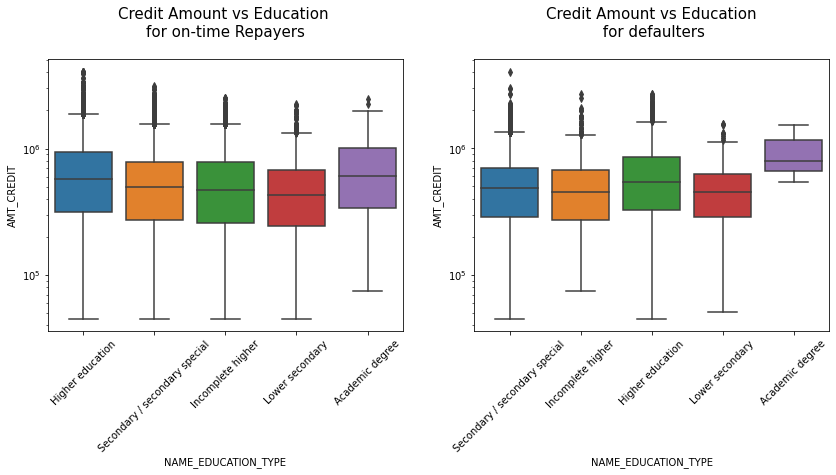

In [108]:
plt.figure(figsize=[14,5])

#Bivariate Analysis for Credit Amount vs Education Type wrt on time Repayers
plt.subplot(1,2,1)
sns.boxplot(data=app_t0,x="NAME_EDUCATION_TYPE",y="AMT_CREDIT")
plt.title("Credit Amount vs Education \nfor on-time Repayers\n",fontdict={"fontsize":15,'color':"black"})
plt.yscale("log")
plt.xticks(rotation=45)

#Bivariate Analysis for Credit Amount vs Education Type wrt defaulters
plt.subplot(1,2,2)
sns.boxplot(data=app_t1,x="NAME_EDUCATION_TYPE",y="AMT_CREDIT")
plt.title("Credit Amount vs Education\n for defaulters\n",fontdict={"fontsize":15,'color':"black"})
plt.yscale("log")
plt.xticks(rotation=45)
plt.show()

### *Observations-*
#### *1- The lower fences for all the education categories lie in the lower region of credit amount- which means even higher education people opted for lower credit amount*
#### *2- The academic degree for defaulters lie in a particular range of amount credit*

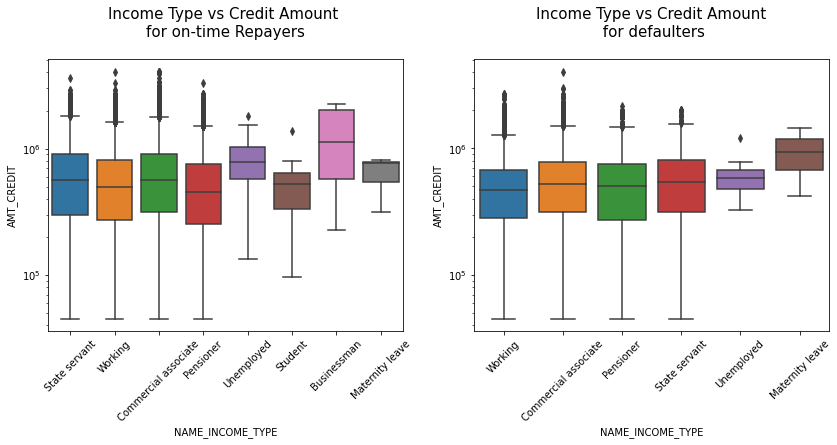

In [109]:
plt.figure(figsize=[14,5])

#Bivariate Analysis for Credit Amount vs Income Type wrt on time Repayers.
plt.subplot(1,2,1)
sns.boxplot(data=app_t0,x="NAME_INCOME_TYPE",y="AMT_CREDIT")
plt.title("Income Type vs Credit Amount \nfor on-time Repayers\n",fontdict={"fontsize":15,'color':"black"})
plt.yscale("log")
plt.xticks(rotation=45)

#Bivariate Analysis for Credit Amount vs Income Type wrt defaulters.
plt.subplot(1,2,2)
sns.boxplot(data=app_t1,x="NAME_INCOME_TYPE",y="AMT_CREDIT")
plt.title("Income Type vs Credit Amount\n for defaulters\n",fontdict={"fontsize":15,'color':"black"})
plt.yscale("log")
plt.xticks(rotation=45)
plt.show()

### *Observation-*
#### *1-As we can see that all Business man are the in the higher rangeof Credit amount takers as compared to other*
#### *2-Where for state servant,working,commercial associate and pensioner their range of credit varies strongly*
#### *3- We can clearly see that there are no defaulters in Bussiness man*

### *Correlation*

#### *Correlation Matrix For Target = 0*

In [110]:
# Finding corelation Matrix for On-time Repayers

cor0= round(app_t0.corr(),2)
cor0

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
SK_ID_CURR,1.0,NaN,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.0,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_INCOME_TOTAL,0.0,NaN,1.00,0.34,0.42,0.35,-0.14,-0.06,-0.02,0.0,-0.19,0.01,0.14,-0.06,-0.03,-0.03,-0.03,-0.03,0.00,0.01,0.01,0.06,0.02,0.04,-0.06
AMT_CREDIT,-0.0,NaN,0.34,1.00,0.77,0.99,-0.07,-0.01,0.00,0.0,-0.10,-0.03,0.13,0.03,-0.00,-0.02,-0.00,-0.02,-0.00,0.01,0.00,0.06,0.02,-0.03,0.05
AMT_ANNUITY,0.0,NaN,0.42,0.77,1.00,0.78,-0.10,-0.04,-0.01,0.0,-0.13,-0.01,0.13,0.02,-0.01,-0.02,-0.01,-0.02,0.00,0.00,0.01,0.04,0.01,-0.01,-0.01
AMT_GOODS_PRICE,-0.0,NaN,0.35,0.99,0.78,1.00,-0.07,-0.02,0.00,0.0,-0.10,-0.02,0.14,0.03,-0.00,-0.02,-0.00,-0.02,-0.00,0.01,0.00,0.06,0.02,-0.03,0.04
DAYS_EMPLOYED,0.0,NaN,-0.14,-0.07,-0.10,-0.07,1.00,0.21,0.28,0.0,0.04,-0.09,-0.03,0.10,0.01,0.02,0.01,0.02,-0.00,-0.00,0.00,-0.03,0.01,0.04,0.63
DAYS_REGISTRATION,0.0,NaN,-0.06,-0.01,-0.04,-0.02,0.21,1.00,0.10,0.0,-0.08,-0.06,0.05,0.09,-0.01,-0.00,-0.01,-0.00,0.00,0.00,0.00,0.01,0.00,0.02,0.33
DAYS_ID_PUBLISH,0.0,NaN,-0.02,0.00,-0.01,0.00,0.28,0.10,1.00,0.0,0.01,-0.08,0.04,0.11,0.01,-0.00,0.01,-0.00,-0.00,0.00,0.01,0.02,0.02,0.06,0.27
FLAG_MOBIL,0.0,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


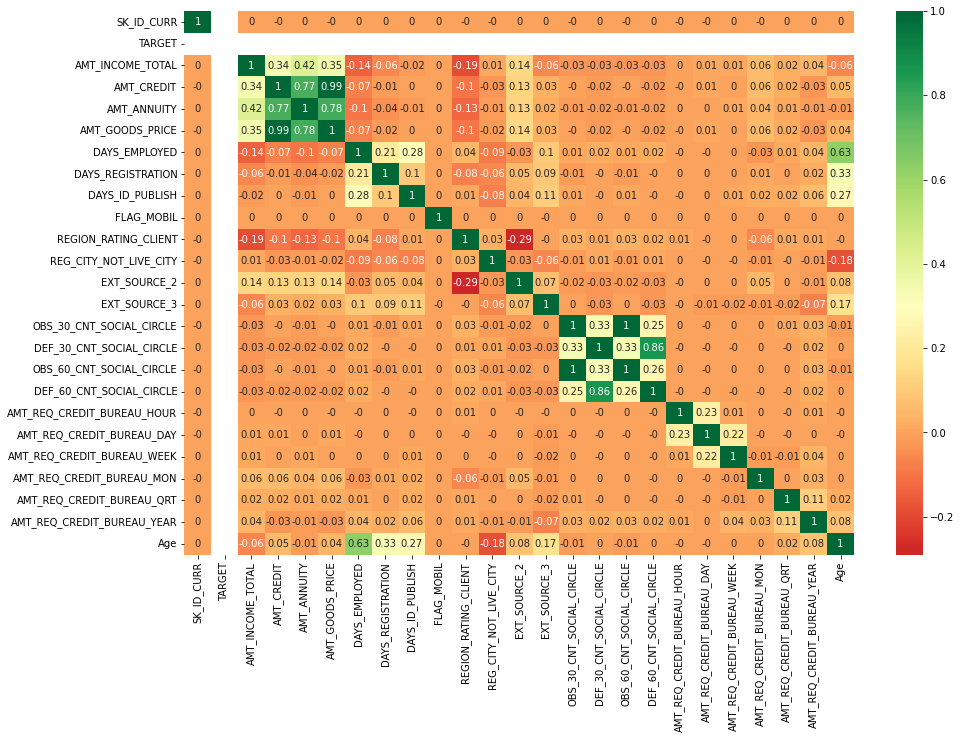

In [111]:
# Plotting a heatmap 
plt.figure(figsize=[15,10])
sns.heatmap(cor0,cmap="RdYlGn",annot=True,center=0.3)
plt.show()

In [112]:
# Finding Top'10' Correlation Matrix.

corr0 = cor0.abs().unstack().sort_values(ascending=False).dropna()
corr0=corr0[corr0 !=1]
cordf0=pd.DataFrame(corr0[0:20:2]).reset_index()
cordf0.columns=["VAR1","VAR2","CORR"]
start = "\x1B[1;3m"
end = '\x1B[0m'
print(start+"\n-------------Top 10 Correlation for Target = 0------------"+end)
cordf0


-------------Top 10 Correlation for Target = 0------------


,VAR1,VAR2,CORR
0,AMT_GOODS_PRICE,AMT_CREDIT,0.99
1,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.86
2,AMT_ANNUITY,AMT_GOODS_PRICE,0.78
3,AMT_ANNUITY,AMT_CREDIT,0.77
4,Age,DAYS_EMPLOYED,0.63
5,AMT_INCOME_TOTAL,AMT_ANNUITY,0.42
6,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.35
7,AMT_CREDIT,AMT_INCOME_TOTAL,0.34
8,DAYS_REGISTRATION,Age,0.33
9,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.33


### *Observations:*
#### *1-Goods Price vs Credit amount being the one having the highest correlation of about 0.99*

#### *Correlation Matrix for Target =1*


In [113]:
# Finding corelation Matrix for Defaulters
cor1= round(app_t1.corr(),2)
cor1

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
SK_ID_CURR,1.00,NaN,-0.01,-0.00,-0.01,-0.00,-0.01,-0.01,0.00,NaN,-0.01,0.01,0.01,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,0.01,-0.00,0.01,0.00
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_INCOME_TOTAL,-0.01,NaN,1.00,0.04,0.05,0.04,-0.01,-0.00,0.00,NaN,-0.02,-0.00,0.01,-0.02,-0.00,-0.01,-0.00,-0.00,0.00,0.00,0.00,0.01,0.00,0.01,-0.00
AMT_CREDIT,-0.00,NaN,0.04,1.00,0.75,0.98,0.00,0.03,0.05,NaN,-0.06,-0.03,0.12,0.05,0.02,-0.03,0.02,-0.03,-0.00,0.00,0.01,0.06,-0.01,-0.01,0.14
AMT_ANNUITY,-0.01,NaN,0.05,0.75,1.00,0.75,-0.08,-0.03,0.02,NaN,-0.07,-0.01,0.12,0.03,0.01,-0.02,0.01,-0.03,0.01,0.00,0.03,0.05,-0.01,-0.01,0.01
AMT_GOODS_PRICE,-0.00,NaN,0.04,0.98,0.75,1.00,0.01,0.03,0.06,NaN,-0.07,-0.03,0.13,0.05,0.02,-0.02,0.02,-0.03,-0.00,0.01,0.01,0.06,-0.01,-0.01,0.14
DAYS_EMPLOYED,-0.01,NaN,-0.01,0.00,-0.08,0.01,1.00,0.19,0.23,NaN,0.00,-0.09,0.00,0.08,-0.01,0.00,-0.01,0.01,-0.01,0.02,0.01,-0.02,0.01,0.03,0.58
DAYS_REGISTRATION,-0.01,NaN,-0.00,0.03,-0.03,0.03,0.19,1.00,0.10,NaN,-0.10,-0.05,0.07,0.07,-0.01,-0.01,-0.01,-0.01,0.00,0.01,-0.00,-0.00,0.01,0.01,0.29
DAYS_ID_PUBLISH,0.00,NaN,0.00,0.05,0.02,0.06,0.23,0.10,1.00,NaN,-0.00,-0.07,0.06,0.08,0.02,-0.01,0.02,-0.00,-0.00,0.01,0.00,0.02,0.01,0.07,0.25
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


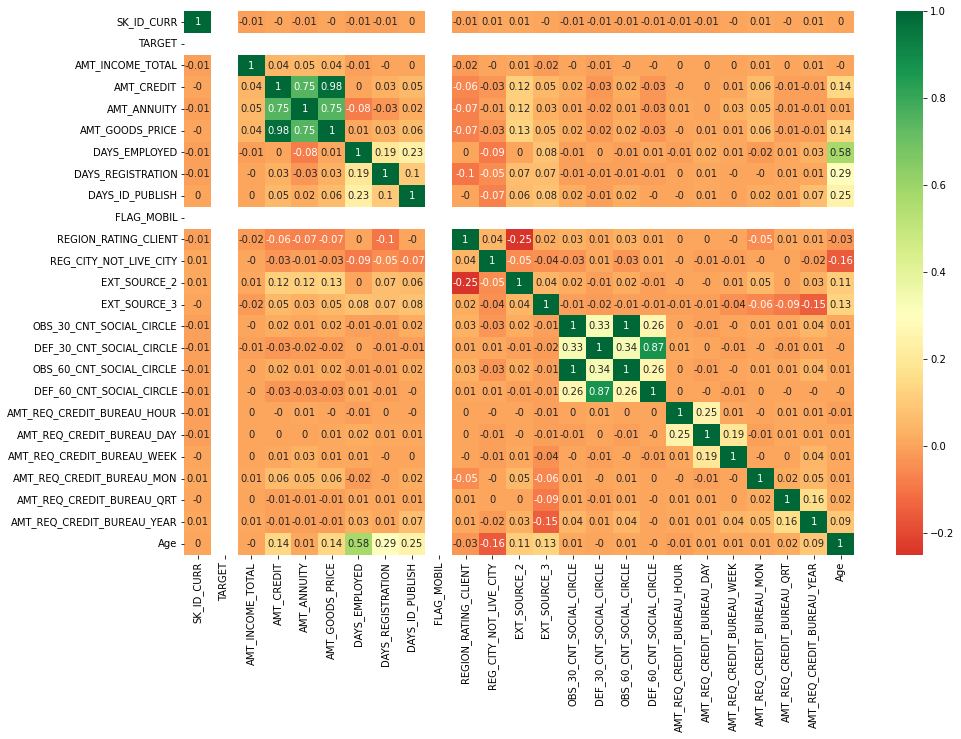

In [114]:
# plotting a heatmap for correlation for defaulters
                           
plt.figure(figsize=[15,10])
sns.heatmap(cor1,cmap="RdYlGn",annot=True,center=0.3)
plt.show()

In [115]:
# Finding Top'10' Correlation Matrix.

corr1 = cor1.abs().unstack().sort_values(ascending=False).dropna()
corr1=corr1[corr1 !=1]
cordf1=pd.DataFrame(corr1[0:20:2]).reset_index()
cordf1.columns=["VAR1","VAR2","CORR"]
start = "\x1B[1;3m"
end = '\x1B[0m'
print(start+"\n-------------Top 10 Correlation for Target = 1------------"+end)
cordf1


-------------Top 10 Correlation for Target = 1------------


,VAR1,VAR2,CORR
0,AMT_GOODS_PRICE,AMT_CREDIT,0.98
1,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
2,AMT_ANNUITY,AMT_GOODS_PRICE,0.75
3,AMT_CREDIT,AMT_ANNUITY,0.75
4,DAYS_EMPLOYED,Age,0.58
5,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.34
6,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.33
7,Age,DAYS_REGISTRATION,0.29
8,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.26
9,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.26


### *Observations:*
#### *-The highest correlation(Goods price vs Credit amount) is same as on-time repayers 0.98~0.99*
#### *-Correlation for Amount Annuuity and credit amount is slightly reduced for defaulters*

### *-------------------------------------------------------------------------------------------------------------------------------------------------------*

## Reading Previous Application File

In [116]:
app_prev=pd.read_csv("C:/Users/Dipanwita Sikder/Documents/Python Project/Credit Risk Analysis/previous_application.csv")

In [117]:
app_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
app_prev.shape

(1670214, 37)

In [119]:
app_prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [120]:
app_prev.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### *Dropping Columns having Nulls more than 40%*

In [121]:
null_perc=round(100*(app_prev.isna().sum()/len(app_prev)),2)
null_perc.sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

In [122]:
# Dropping columns that are having nulls more than 40%
app_prev.drop(null_perc[null_perc > 40].index,axis=1,inplace=True)

In [123]:
app_prev.shape

(1670214, 26)

In [124]:
#checking Null values in previous application.
app_prev.isna().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

### *Imputing Null Values*

##### *AMT_ANNUITY*

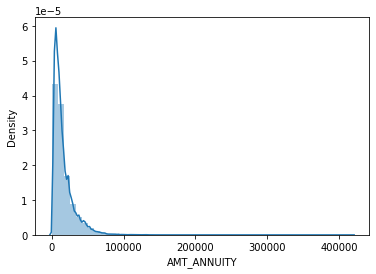

In [125]:
#Plotting a dist plot for checking the values distribution
sns.distplot(app_prev.AMT_ANNUITY,kde=True)
plt.show()

In [126]:
# we will impute the AMT_ANNUITY with median as we can see that the single spike describes there are very few data points with high values , so it will distort the mean
app_prev["AMT_ANNUITY"]=app_prev.AMT_ANNUITY.fillna(app_prev.AMT_ANNUITY.median())

###### *AMT_GOODS_PRICE*

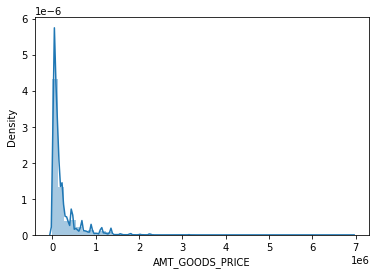

In [127]:
#Plotting a dist plot for checking the values distribution
sns.distplot(app_prev.AMT_GOODS_PRICE)
plt.show()

In [128]:
# Since there is again a big single spike it is better to impute the nulls wih median again.
app_prev["AMT_GOODS_PRICE"]=app_prev.AMT_GOODS_PRICE.fillna(app_prev.AMT_GOODS_PRICE.median())
app_prev.AMT_GOODS_PRICE.isna().sum()

0

##### CNT_PAYMENT

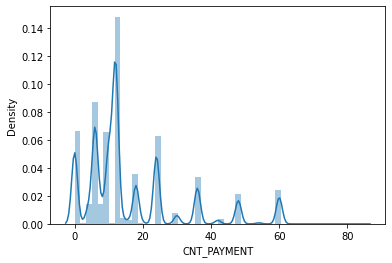

In [129]:
#Plotting a distplot for CNT_PAYMENT for checking distribution of its values
sns.distplot(app_prev.CNT_PAYMENT)
plt.show()

In [130]:
# Imputing mean for CNT_PAYMENT
app_prev["CNT_PAYMENT"]=app_prev.CNT_PAYMENT.fillna(app_prev.CNT_PAYMENT.mean())

#### *NAME_CASH_LOAN_PURPOSE*

In [131]:
#Removing columns having XNA and XAP values
app_prev=app_prev.drop(app_prev[app_prev["NAME_CASH_LOAN_PURPOSE"]=="XNA"].index)
app_prev=app_prev.drop(app_prev[app_prev["NAME_CASH_LOAN_PURPOSE"]=="XAP"].index)

In [132]:
# COnverting DAYS_DECISION to positive values.
app_prev["DAYS_DECISION"]=abs(app_prev["DAYS_DECISION"])

### *Finding Outliers*


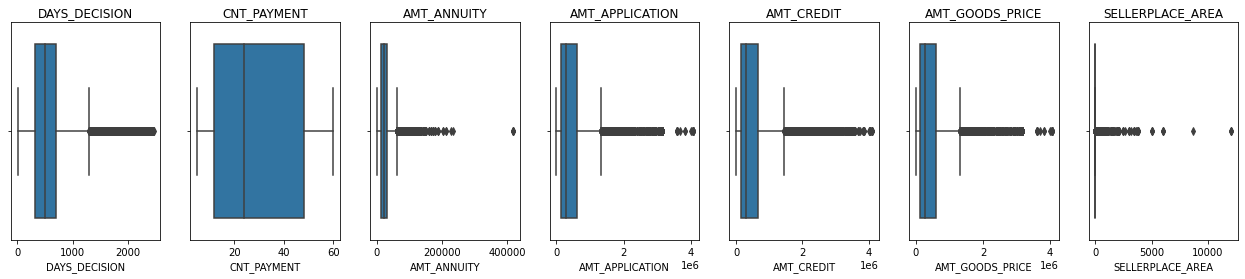

In [133]:
outlier=['DAYS_DECISION','CNT_PAYMENT','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
plt.figure(figsize=[22,4])
for i in enumerate(outlier):
    plt.subplot(1,7,i[0]+1)
    sns.boxplot(app_prev[i[1]])
    plt.title(i[1])

### *Observations*
#### *1-As we can see CNT_PAYMENT has no outliers*
#### *2-SELLERPLACE_AREA, AMT_CREDIT,AMT_GOODS_PRICE, AMT_APPLICATION have huge number of outliers*
#### *3-DAYS_DECISION has huge number of outliers*


## *Merging DataFrames*

In [134]:
# Merging the two data frames for further analysis
merged_app=pd.merge(app,app_prev,on="SK_ID_CURR",how="inner")
merged_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START_x,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,INCOME_RANGE,AMT_CREDIT_BINS,Age_Bins,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,1010,4799.0,3015,1,Laborers,2,TUESDAY,0,Business Entity Type 3,0.502779,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,Very Low(<1L),1L-2L,Below 30's,1390369,Cash loans,22430.430,94500.0,109971.0,94500.0,FRIDAY,11,Y,1,Other,Approved,599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,2668,5266.0,3787,1,Laborers,2,WEDNESDAY,0,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,42,Medium(2L-3L),6L-10L,In 40's,1344613,Cash loans,33238.800,1260000.0,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,2060,3557.0,3557,1,Drivers,2,THURSDAY,1,Self-employed,0.321745,0.411849,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,32,High(3L-5L),6L-10L,In 30's,1077565,Cash loans,52513.515,1350000.0,1487214.0,1350000.0,MONDAY,14,Y,1,Buying a used car,Approved,695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,1761,8236.0,4292,1,Managers,2,TUESDAY,0,Business Entity Type 3,0.738053,0.605836,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,44,Low(1L-2L),4L-6L,In 40's,1223113,Cash loans,28390.635,337500.0,407911.5,337500.0,MONDAY,13,Y,1,Repairs,Approved,539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,1761,8236.0,4292,1,Managers,2,TUESDAY,0,Business Entity Type 3,0.738053,0.605836,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,44,Low(1L-2L),4L-6L,In 40's,1529558,Cash loans,29053.215,450000.0,555723.0,450000.0,MONDAY,15,Y,1,Repairs,Refused,449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low


In [135]:
merged_app.shape

(59413, 65)

In [136]:
# Renaming the columns 
app_final=merged_app.rename({"NAME_CONTRACT_TYPE_x":"NAME_CONTRACT_TYPE","AMT_CREDIT_x":"AMT_CREDIT",
                             "AMT_ANNUITY_x":"AMT_ANNUITY","AMT_GOODS_PRICE_x":"AMT_GOODS_PRICE",
                             "WEEKDAY_APPR_PROCESS_START_x":"WEEKDAY_APPR_PROCESS_START",
                             "NAME_CONTRACT_TYPE_y":"NAME_CONTRACT_TYPE_PRE","AMT_ANNUITY_y":"AMT_ANNUITY_PRE",
                             "AMT_CREDIT_y":"AMT_CREDIT_PRE","AMT_GOODS_PRICE_y":"AMT_GOODS_PRICE_PRE",
                             "WEEKDAY_APPR_PROCESS_START_y":"WEEKDAY_APPR_PROCESS_START_PRE"},axis=1)

In [137]:
app_final.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,INCOME_RANGE,AMT_CREDIT_BINS,Age_Bins,SK_ID_PREV,NAME_CONTRACT_TYPE_PRE,AMT_ANNUITY_PRE,AMT_APPLICATION,AMT_CREDIT_PRE,AMT_GOODS_PRICE_PRE,WEEKDAY_APPR_PROCESS_START_PRE,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,1010,4799.0,3015,1,Laborers,2,TUESDAY,0,Business Entity Type 3,0.502779,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,Very Low(<1L),1L-2L,Below 30's,1390369,Cash loans,22430.430,94500.0,109971.0,94500.0,FRIDAY,11,Y,1,Other,Approved,599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,2668,5266.0,3787,1,Laborers,2,WEDNESDAY,0,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,42,Medium(2L-3L),6L-10L,In 40's,1344613,Cash loans,33238.800,1260000.0,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,2060,3557.0,3557,1,Drivers,2,THURSDAY,1,Self-employed,0.321745,0.411849,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,32,High(3L-5L),6L-10L,In 30's,1077565,Cash loans,52513.515,1350000.0,1487214.0,1350000.0,MONDAY,14,Y,1,Buying a used car,Approved,695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,1761,8236.0,4292,1,Managers,2,TUESDAY,0,Business Entity Type 3,0.738053,0.605836,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,44,Low(1L-2L),4L-6L,In 40's,1223113,Cash loans,28390.635,337500.0,407911.5,337500.0,MONDAY,13,Y,1,Repairs,Approved,539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,1761,8236.0,4292,1,Managers,2,TUESDAY,0,Business Entity Type 3,0.738053,0.605836,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,44,Low(1L-2L),4L-6L,In 40's,1529558,Cash loans,29053.215,450000.0,555723.0,450000.0,MONDAY,15,Y,1,Repairs,Refused,449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low


In [138]:
# Removing unwanted columns #
app_final.drop(["SK_ID_CURR","NAME_TYPE_SUITE","NAME_TYPE_SUITE","REG_CITY_NOT_LIVE_CITY","HOUR_APPR_PROCESS_START",
                "FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY"],axis=1,inplace=True)

In [139]:
app_final.describe()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,REGION_RATING_CLIENT,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,SK_ID_PREV,AMT_ANNUITY_PRE,AMT_APPLICATION,AMT_CREDIT_PRE,AMT_GOODS_PRICE_PRE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,59413.000000,5.941300e+04,5.941300e+04,59413.000000,5.941300e+04,59413.000000,59413.000000,59413.000000,59413.0,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,5.941300e+04,59413.000000,5.941300e+04,5.941300e+04,5.941300e+04,59413.000000,59413.000000,59413.000000
mean,0.130258,1.821284e+05,5.598321e+05,26868.701227,5.014153e+05,51119.362867,4639.411713,2943.405349,1.0,2.048323,0.499711,0.448398,1.666790,0.163011,1.648713,0.112349,0.005521,0.006009,0.034841,0.314106,0.323852,3.086059,43.712016,1.935293e+06,25627.835809,4.519988e+05,5.079813e+05,4.519988e+05,631.822833,9.513675,29.502376
std,0.336590,9.810533e+04,3.669192e+05,13611.946588,3.381718e+05,123866.654476,3475.761400,1494.329186,0.0,0.484984,0.196424,0.186038,2.616209,0.481221,2.596003,0.384885,0.078936,0.104505,0.199975,1.136483,0.715293,2.431105,11.262719,5.301690e+05,17389.961864,4.943563e+05,5.396833e+05,4.943563e+05,526.999047,131.046191,17.646007
min,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,5.000000,0.000000,0.000000,1.0,1.000000,0.000006,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,1.000125e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,-1.000000,5.000000
25%,0.000000,1.125000e+05,2.700000e+05,16911.000000,2.295000e+05,900.000000,1633.000000,1722.000000,1.0,2.000000,0.369585,0.309275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34.000000,1.479931e+06,13489.785000,1.350000e+05,1.528200e+05,1.350000e+05,305.000000,-1.000000,12.000000
50%,0.000000,1.575000e+05,4.856400e+05,24961.500000,4.500000e+05,1922.000000,4151.000000,3132.000000,1.0,2.000000,0.552406,0.492060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,43.000000,1.941703e+06,21361.725000,2.475000e+05,3.049245e+05,2.475000e+05,490.000000,-1.000000,24.000000
75%,0.000000,2.250000e+05,7.551900e+05,34168.500000,6.750000e+05,4367.000000,6972.000000,4240.000000,1.0,2.000000,0.654097,0.554947,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,53.000000,2.390904e+06,32598.000000,5.850000e+05,6.750000e+05,5.850000e+05,686.000000,0.000000,48.000000
max,1.000000,2.214117e+06,3.150000e+06,215500.500000,3.150000e+06,365243.000000,20838.000000,6232.000000,1.0,3.000000,0.855000,0.874844,30.000000,6.000000,29.000000,5.000000,2.000000,9.000000,8.000000,24.000000,6.000000,23.000000,69.000000,2.845265e+06,418058.145000,4.050000e+06,4.104351e+06,4.050000e+06,2406.000000,12102.000000,60.000000


## *Univariate Analysis*

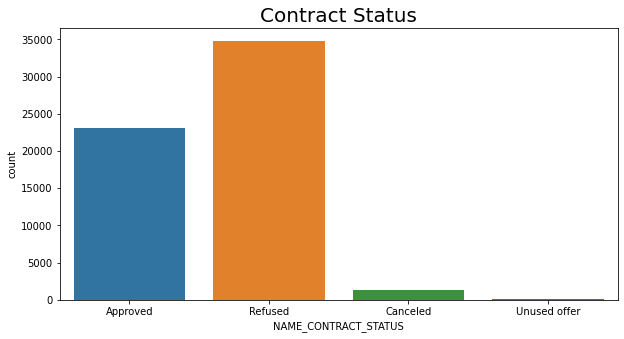

In [140]:
# Plotting a graph for checking contract status
plt.figure(figsize=[10,5])
sns.countplot(app_final['NAME_CONTRACT_STATUS'])
plt.title("Contract Status",fontdict={'fontsize':20,'color':'black'})
plt.show()

#### *Obs:As we can see most of the applications are Rejected and very few are unused or cancelled*

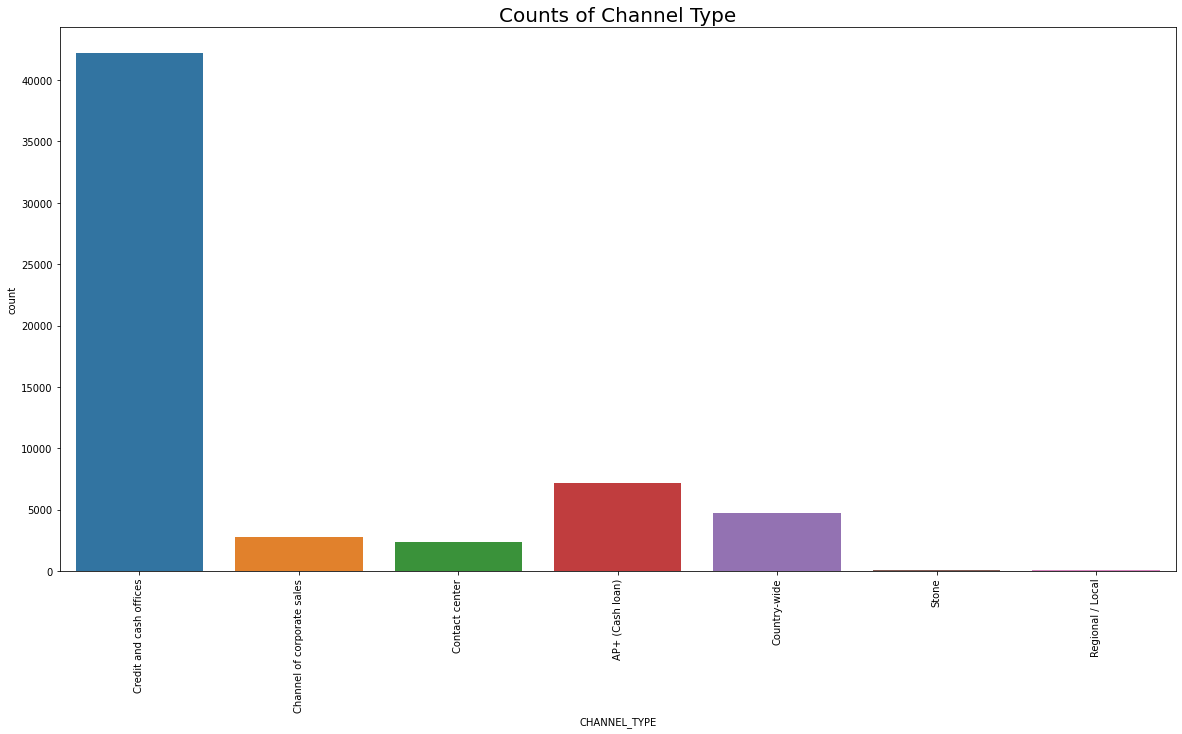

In [141]:
# Plotting count plot to check Channel Type counts.

plt.figure(figsize=[20,10])
sns.countplot(app_final['CHANNEL_TYPE'])
plt.xticks(rotation=90)
plt.title("Counts of Channel Type",fontdict={'fontsize':20,'color':'black'})
plt.show()

#### *Obs: As can be seen most of the previous applications have Credit and Cash offices as their CHANNEL_TYPE*

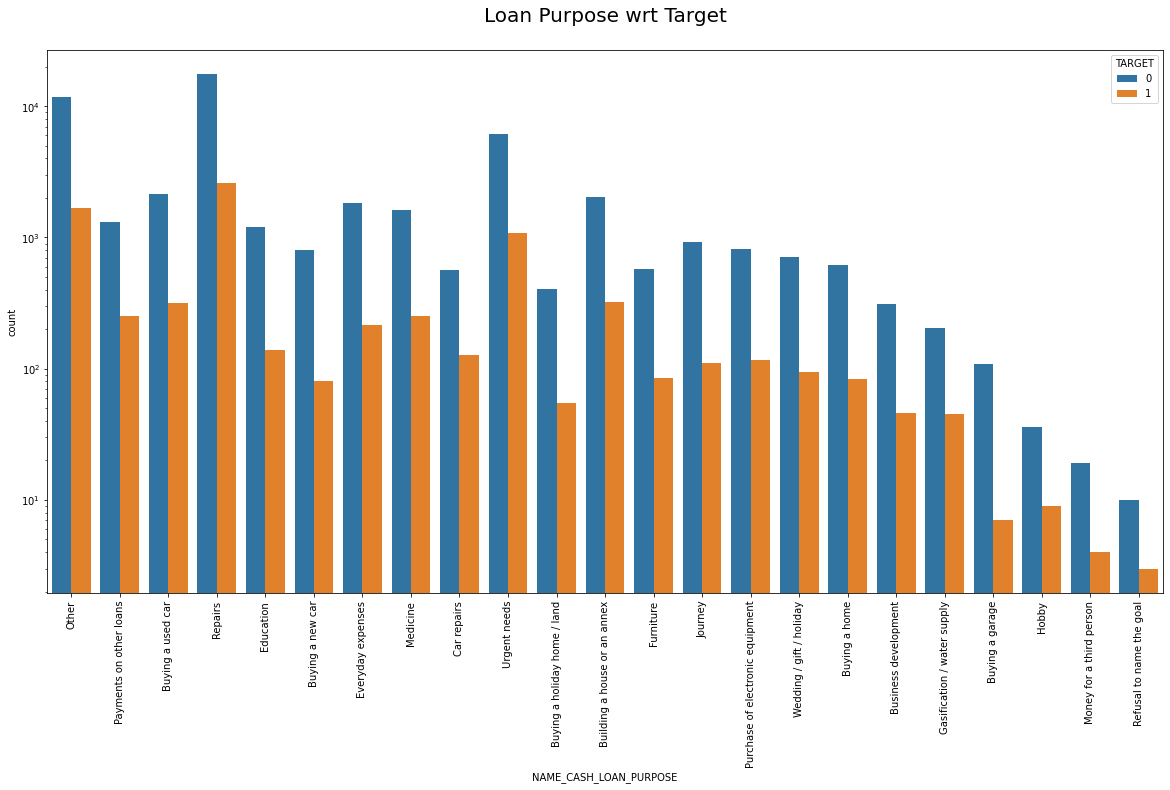

In [142]:
# Plotting a countplot for Loan purpose segregated with Target variable.

plt.figure(figsize=[20,10])
sns.countplot(app_final['NAME_CASH_LOAN_PURPOSE'],hue=app_final["TARGET"])
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Loan Purpose wrt Target\n",fontdict={'fontsize':20,'color':'black'})
plt.show()

### *Observations*
#### *1-Applicants with loan purpose as Repairs have higher number of facing difficulties in re-payments*
#### *2-People who have refused to name the goal have almost cleared all their dues within time*
#### *3-Purposes like money to third person,buying a garage, water supply,business development have difficulty in repayment less than 50% compared to on time re-payers*


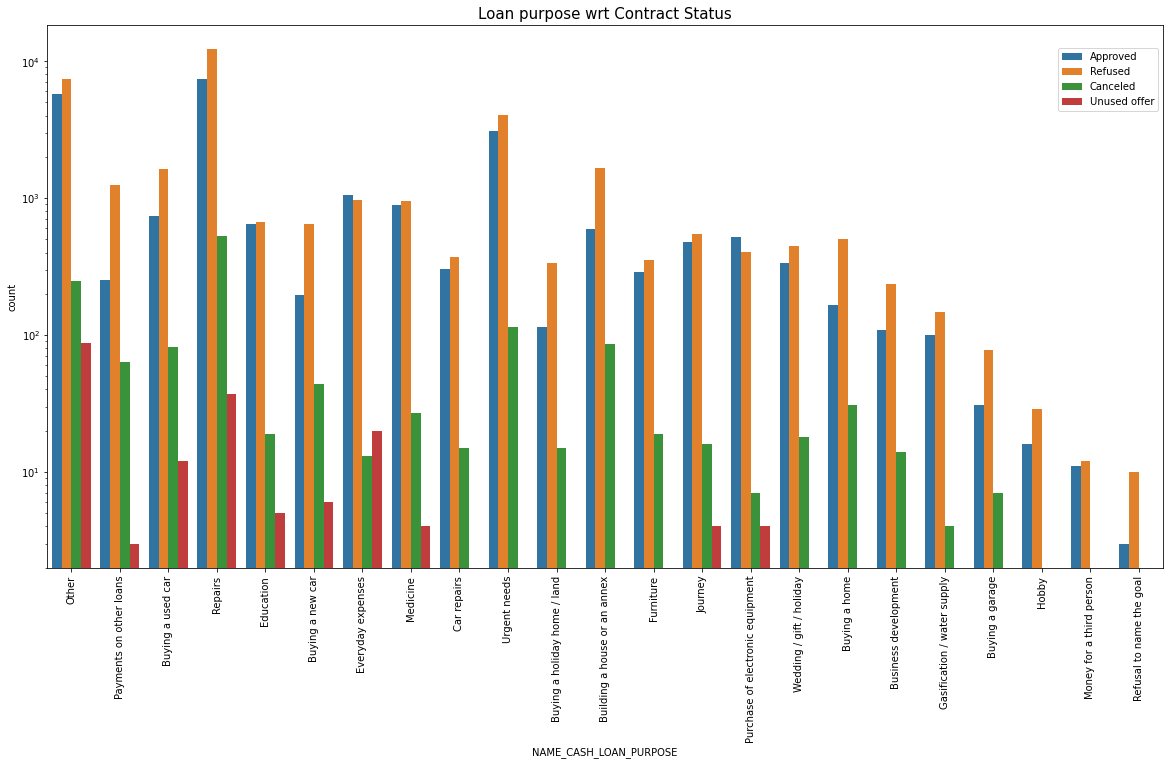

In [143]:
# Plotting a Graph to check the offer status wrt purpose of loan.

plt.figure(figsize=[20,10])
sns.countplot(app_final['NAME_CASH_LOAN_PURPOSE'],hue=app_final["NAME_CONTRACT_STATUS"])
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Loan purpose wrt Contract Status",fontdict={'fontsize':15,'color':'black'})
plt.legend(bbox_to_anchor=(1,0.9),loc="right")
plt.show()

### *Observations:*
#### *1-Repairs have the highest number of rejections as in loan purposes.*
#### *2-Paying to other loans , Refusal to name the goal and buying a new car have significant number of rejections when compared to approval rate.*
#### *3-Education and money to a third person have almost equal number of approvals and rejections.*

## *Bivariate Analysis*

In [144]:
app_final.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,INCOME_RANGE,AMT_CREDIT_BINS,Age_Bins,SK_ID_PREV,NAME_CONTRACT_TYPE_PRE,AMT_ANNUITY_PRE,AMT_APPLICATION,AMT_CREDIT_PRE,AMT_GOODS_PRICE_PRE,WEEKDAY_APPR_PROCESS_START_PRE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,0,Revolving loans,M,N,Y,90000.0,180000.0,9000.0,180000.0,Working,Higher education,Single / not married,With parents,1010,4799.0,3015,1,Laborers,2,TUESDAY,Business Entity Type 3,0.502779,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,Very Low(<1L),1L-2L,Below 30's,1390369,Cash loans,22430.430,94500.0,109971.0,94500.0,FRIDAY,Other,Approved,599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,0,Cash loans,F,N,Y,292500.0,665892.0,24592.5,477000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,2668,5266.0,3787,1,Laborers,2,WEDNESDAY,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,42,Medium(2L-3L),6L-10L,In 40's,1344613,Cash loans,33238.800,1260000.0,1260000.0,1260000.0,WEDNESDAY,Payments on other loans,Refused,119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,0,Cash loans,M,Y,N,360000.0,733315.5,39069.0,679500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,2060,3557.0,3557,1,Drivers,2,THURSDAY,Self-employed,0.321745,0.411849,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,32,High(3L-5L),6L-10L,In 30's,1077565,Cash loans,52513.515,1350000.0,1487214.0,1350000.0,MONDAY,Buying a used car,Approved,695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,0,Revolving loans,M,Y,Y,180000.0,540000.0,27000.0,540000.0,Working,Higher education,Married,House / apartment,1761,8236.0,4292,1,Managers,2,TUESDAY,Business Entity Type 3,0.738053,0.605836,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,44,Low(1L-2L),4L-6L,In 40's,1223113,Cash loans,28390.635,337500.0,407911.5,337500.0,MONDAY,Repairs,Approved,539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,0,Revolving loans,M,Y,Y,180000.0,540000.0,27000.0,540000.0,Working,Higher education,Married,House / apartment,1761,8236.0,4292,1,Managers,2,TUESDAY,Business Entity Type 3,0.738053,0.605836,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,44,Low(1L-2L),4L-6L,In 40's,1529558,Cash loans,29053.215,450000.0,555723.0,450000.0,MONDAY,Repairs,Refused,449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low


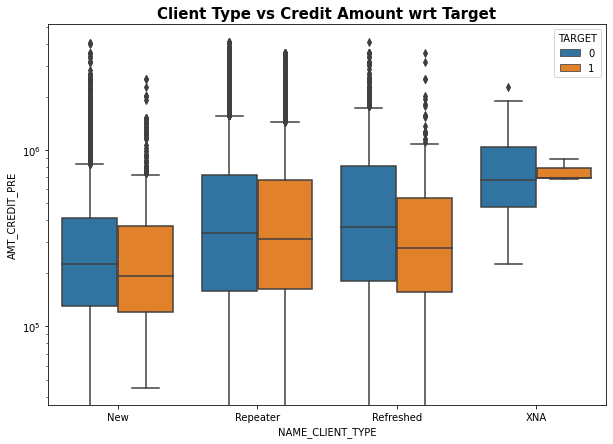

In [145]:
# Plotting boxplot for client type Vs their credit amount wrt to Target

plt.figure(figsize=[10,7])
sns.boxplot(x=app_final.NAME_CLIENT_TYPE,y=app_final.AMT_CREDIT_PRE,hue=app_final.TARGET)
plt.title("Client Type vs Credit Amount wrt Target",fontdict={'fontsize':15,'color':'black',"fontweight":"bold"})
plt.yscale("log")
plt.show()

#### *Obs: As we can see the Credit amount for new applicants have the lowest  median as compare to others*

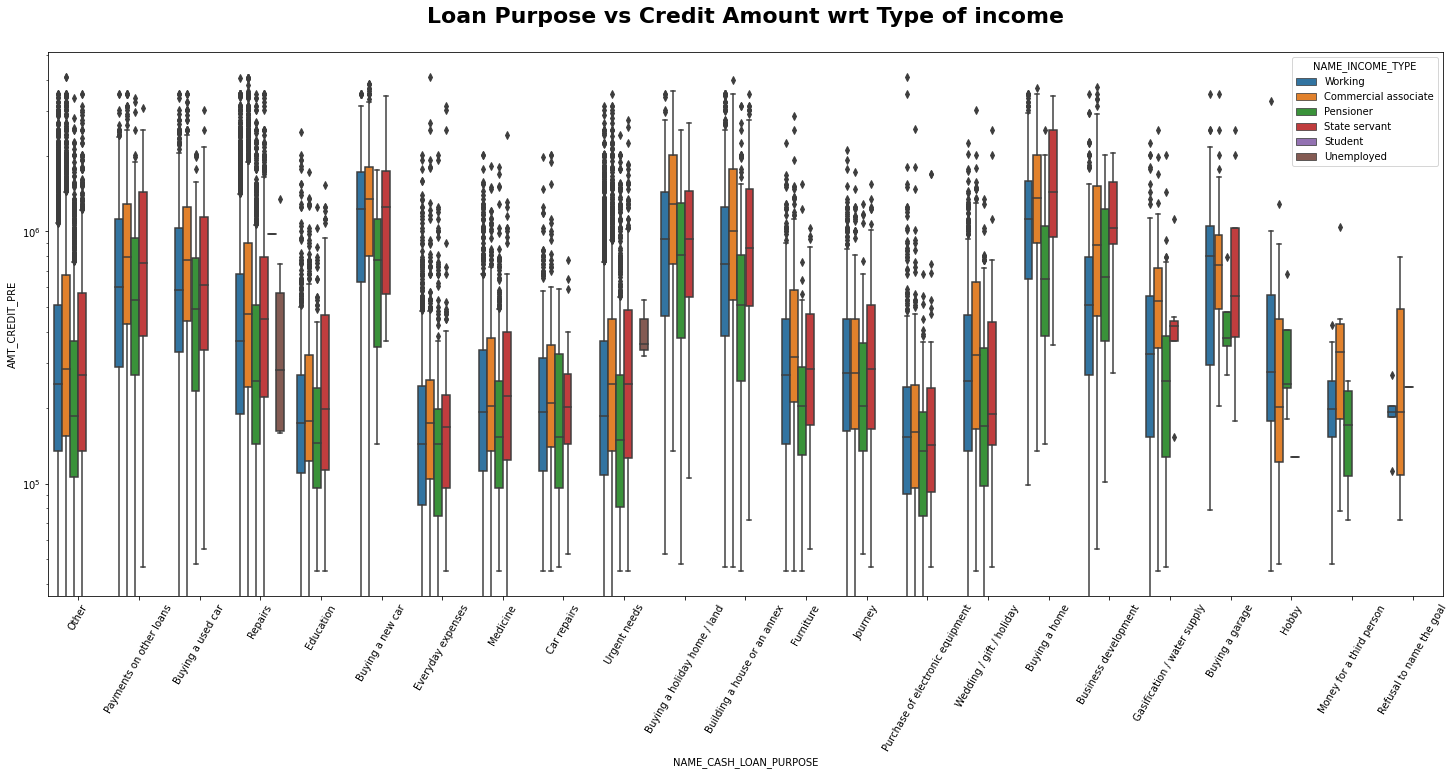

In [146]:
# Plotting boxplot for Loan Purpose Vs their credit amount wrt to Target

plt.figure(figsize=[25,10])
sns.boxplot(x=app_final.NAME_CASH_LOAN_PURPOSE,y=app_final.AMT_CREDIT_PRE,hue=app_final.NAME_INCOME_TYPE)
plt.title("Loan Purpose vs Credit Amount wrt Type of income\n",fontdict={'fontsize':22,"fontweight":"bold",'color':'black'})
plt.xticks(rotation=60)
plt.yscale("log")
plt.show()

### *Obs:*
#### *1-As we can see the Loan amount for Buying a home or a land , buying a new car or business developments have their highest credit amount for type of Income types*
#### *2-Credit amount for Purchase of everyday expenses & Purchase of electronic equip. aims to be the lowest amount among others.*
#### *3-The Median Credits for state Servant aims to be higher in respective to other Income types.*

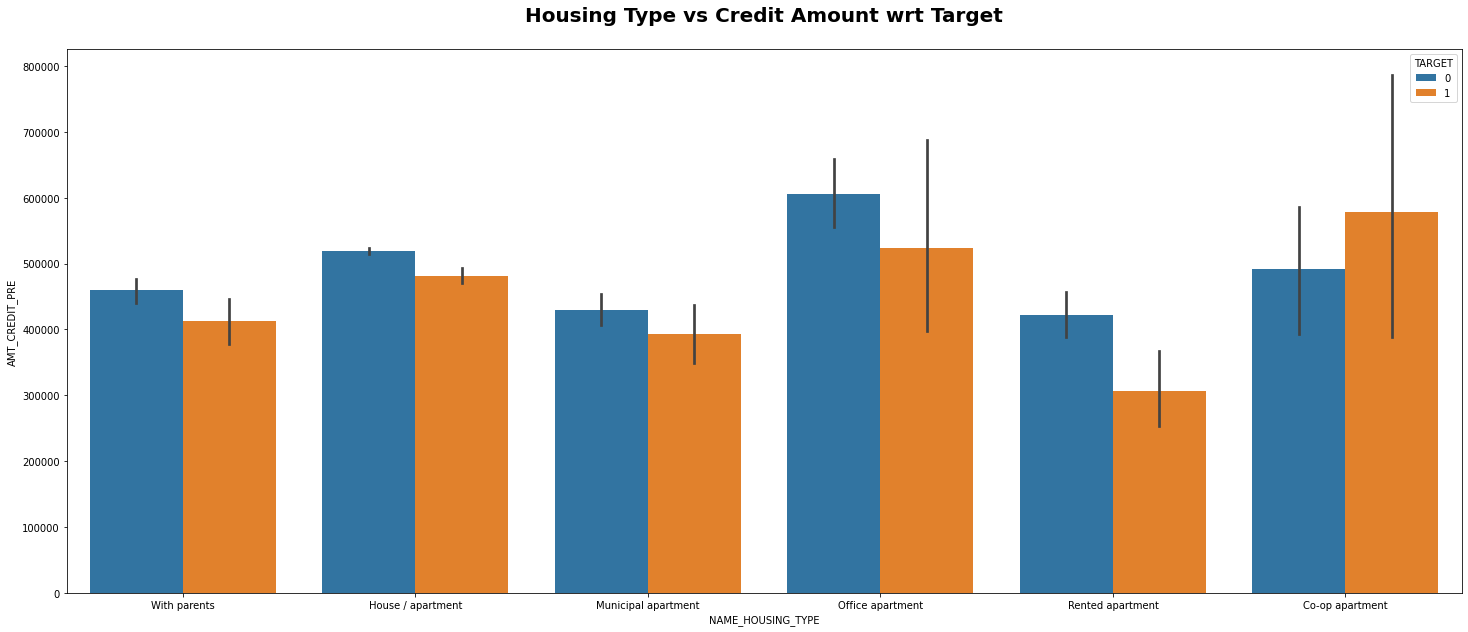

In [147]:
# Plotting barplot for Housing type Vs their credit amount wrt to Target

plt.figure(figsize=[25,10])
sns.barplot(x=app_final.NAME_HOUSING_TYPE,y=app_final.AMT_CREDIT_PRE,hue=app_final.TARGET)
plt.title("Housing Type vs Credit Amount wrt Target\n",fontdict={'fontsize':20,"fontweight":"bold",'color':'black'})
plt.show()

### *Obs:*
#### *1-As we can see that Co-op Apartment have higher no:of difficulty of payments wrt higher credit amount. So the bank should avoid giving higher credit for Co-op Apartment.*

### ----------------------------------------------------------------------------------------------------------------------------------------------------------------

## *Conclusions(Repayers)*

##### -Bank should consider giving more Revolving  Loans.
##### -Applicants with High Income( greater than 6L ) are less likely to default.
##### -Loan applicants with organization  Trade Type 4 are less likely to default.
##### -Loan takers with Academic degree are less likely to default.
#####  -Should consider giving loan to more Females.
##### -Students and Businessman are less likely to default. So can be considered.

### *Conclusions (Defaulters)*

##### -Gender male are more likely to default.
##### -Unemployed and Maternity leave people are more likely to default.
##### -People living in rented apartment are more likely to default.
##### -Industry type 3,13,8 are more likely to default.
##### -Application with loan purpose as Repairs are more likely to default and most of them are rejected by the bank.
##### -Applicants who live in region 3 are more likely to default.